# Data preprocessing

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df= pd.read_csv("../data/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
#checking missing values in a dataset
df.isnull().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### no null data are present

## Treating outliers
### let's refill the outliers with median data


In [5]:
q1=df["crim"].quantile(0.25)
q3=df["crim"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
condition = (df["crim"] < lower_bound) | (df["crim"] > upper_bound)
df[condition]
# lower_bound, upper_bound

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
367,13.5222,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
371,9.2323,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
373,11.1081,0.0,18.1,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
374,18.4982,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
375,19.6091,0.0,18.1,0,0.671,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,15.5757,0.0,18.1,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13,19.1
469,13.0751,0.0,18.1,0,0.580,5.713,56.7,2.8237,24,666,20.2,396.90,14.76,20.1
477,15.0234,0.0,18.1,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
478,10.2330,0.0,18.1,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6


In [6]:
columns_to_handle_outliers=list(df.columns.values)
print(type(list(columns_to_handle_outliers)))
columns_to_handle_outliers.remove("chas")
columns_to_handle_outliers.remove("rad")
columns_to_handle_outliers

<class 'list'>


['crim',
 'zn',
 'indus',
 'nox',
 'rm',
 'age',
 'dis',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [7]:
for col in columns_to_handle_outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    print(f"Column: {col}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    median_without_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col].median()
    print(f"Median without outliers: {median_without_outliers}")

    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_without_outliers


Column: crim
Lower Bound: -5.31051125
Upper Bound: 9.06963875
Median without outliers: 0.17643999999999999
Column: zn
Lower Bound: -18.75
Upper Bound: 31.25
Median without outliers: 0.0
Column: indus
Lower Bound: -14.175
Upper Bound: 37.465
Median without outliers: 9.69
Column: nox
Lower Bound: 0.18650000000000005
Upper Bound: 0.8865
Median without outliers: 0.538
Column: rm
Lower Bound: 4.778499999999999
Upper Bound: 7.730500000000001
Median without outliers: 6.1835
Column: age
Lower Bound: -28.54999999999999
Upper Bound: 167.64999999999998
Median without outliers: 77.5
Column: dis
Lower Bound: -2.5322000000000005
Upper Bound: 9.820800000000002
Median without outliers: 3.1523
Column: tax
Lower Bound: -301.5
Upper Bound: 1246.5
Median without outliers: 330.0
Column: ptratio
Lower Bound: 13.199999999999998
Upper Bound: 24.4
Median without outliers: 19.1
Column: b
Lower Bound: 344.10624999999993
Upper Bound: 427.49625000000003
Median without outliers: 393.25
Column: lstat
Lower Bound: -8

In [8]:
df.loc[367]

crim         0.17644
zn           0.00000
indus       18.10000
chas         0.00000
nox          0.63100
rm           6.18350
age        100.00000
dis          1.51060
rad         24.00000
tax        666.00000
ptratio     20.20000
b          393.25000
lstat       13.33000
medv        23.10000
Name: 367, dtype: float64

<Axes: >

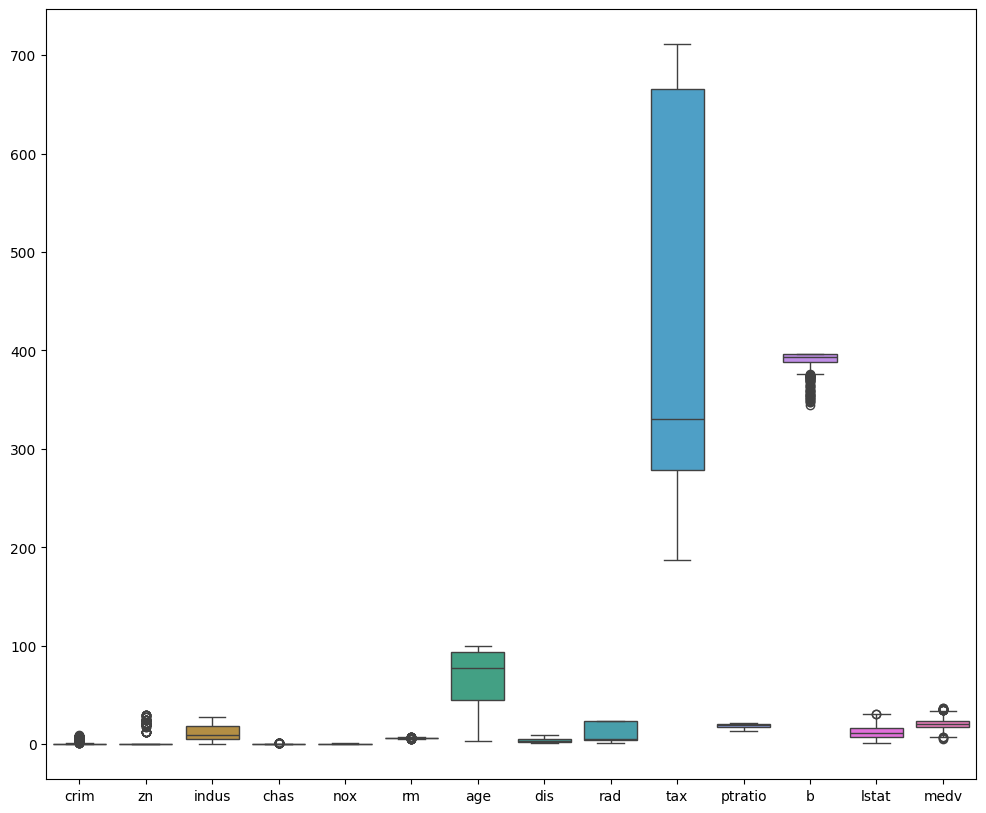

In [9]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)

## Encoding categorical data
#### It seems like "chas" is categorical data with values 0 and 1 . so type is just to be changed

### One- Hot Encodoing for "rad" and dropping previous for removing multicollineariy

In [10]:
df["chas"]=df["chas"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     506 non-null    float64 
 1   zn       506 non-null    float64 
 2   indus    506 non-null    float64 
 3   chas     506 non-null    category
 4   nox      506 non-null    float64 
 5   rm       506 non-null    float64 
 6   age      506 non-null    float64 
 7   dis      506 non-null    float64 
 8   rad      506 non-null    int64   
 9   tax      506 non-null    int64   
 10  ptratio  506 non-null    float64 
 11  b        506 non-null    float64 
 12  lstat    506 non-null    float64 
 13  medv     506 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


In [11]:
df=pd.get_dummies(df, columns=["rad"], drop_first=True, prefix="rad")

In [12]:
df

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,lstat,medv,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,4.98,24.0,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,9.14,21.6,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,4.03,34.7,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,2.94,33.4,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,5.33,36.2,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,...,9.67,22.4,False,False,False,False,False,False,False,False
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,...,9.08,20.6,False,False,False,False,False,False,False,False
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,...,5.64,23.9,False,False,False,False,False,False,False,False
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,...,6.48,22.0,False,False,False,False,False,False,False,False


In [13]:
# let's convert the boolean value into int
df=df.astype({col: "int" for col in df.select_dtypes(include=["bool"]).columns})
df

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,lstat,medv,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,4.98,24.0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,9.14,21.6,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,4.03,34.7,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,2.94,33.4,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,5.33,36.2,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,...,9.67,22.4,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,...,9.08,20.6,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,...,5.64,23.9,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,...,6.48,22.0,0,0,0,0,0,0,0,0


In [14]:
# seperate features and target variable
features= df.drop(columns=["medv"])
# features.info()
target=df["medv"]
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: medv
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [16]:
features

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,0,0,0,0,0,0,0,0


In [15]:
scaler=StandardScaler()

In [19]:
feature_Scaled=pd.DataFrame(scaler.fit_transform(features), columns=features.columns) 
feature_Scaled

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,-0.526232,2.073018,-1.287909,-0.272599,-0.144217,0.666660,-0.120013,0.187983,-0.666608,-1.724724,0.720597,-1.108606,-0.223142,-0.284950,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,-0.594089
1,-0.515799,-0.376045,-0.593381,-0.272599,-0.740262,0.368850,0.367166,0.631271,-0.987329,-0.433274,0.720597,-0.480763,4.481443,-0.284950,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,-0.594089
2,-0.515809,-0.376045,-0.593381,-0.272599,-0.740262,1.846298,-0.265812,0.631271,-0.987329,-0.433274,0.329697,-1.251983,4.481443,-0.284950,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,-0.594089
3,-0.513284,-0.376045,-1.306878,-0.272599,-0.835284,1.484671,-0.809889,1.184737,-1.106115,0.031648,0.502577,-1.416490,-0.223142,3.509386,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,-0.594089
4,-0.495053,-0.376045,-1.306878,-0.272599,-0.835284,1.772812,-0.511180,1.184737,-1.106115,0.031648,0.720597,-1.055782,-0.223142,3.509386,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,-0.594089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.498244,-0.376045,0.115738,-0.272599,0.158124,0.701469,0.018673,-0.626422,-0.803212,1.219782,0.249020,-0.400774,-0.223142,-0.284950,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,-0.594089
502,-0.506873,-0.376045,0.115738,-0.272599,0.158124,-0.213234,0.288933,-0.723004,-0.803212,1.219782,0.720597,-0.489819,-0.223142,-0.284950,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,-0.594089
503,-0.499173,-0.376045,0.115738,-0.272599,0.158124,1.442127,0.797449,-0.783653,-0.803212,1.219782,0.720597,-1.008996,-0.223142,-0.284950,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,-0.594089
504,-0.474903,-0.376045,0.115738,-0.272599,0.158124,1.090169,0.736996,-0.671757,-0.803212,1.219782,0.389245,-0.882220,-0.223142,-0.284950,-0.527046,-0.542326,-0.232737,-0.186453,-0.223142,-0.594089


In [20]:
X_train, X_test, y_train, y_test = train_test_split(feature_Scaled, target, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 20), (102, 20), (404,), (102,))

In [22]:
404+102

506

In [23]:
X_train.to_csv("../data/X_train.csv", index=False)

In [24]:
y_train.to_csv("../data/y_train.csv", index=False)

In [25]:
X_test.to_csv("../data/x_test.csv", index=False)

In [26]:
y_test.to_csv("../data/y_test.csv", index=False)